In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree,metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv(r"C:\Users\91863\Downloads\Fraud_check.csv")
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
data.shape

(600, 6)

In [4]:
data = data.rename({"Taxable.Income":"Taxable_Income","City.Population":"city_pop","Work.Experience":"work_exp","Marital.Status":"Marital_status","Undergrad":"Under_grad"},axis=1)

In [5]:
data

,Under_grad,Marital_status,Taxable_Income,city_pop,work_exp,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [6]:
data['Under_grad'] = np.where(data['Under_grad'].str.contains("YES"), 1, 0)
data['Urban'] = np.where(data['Urban'].str.contains("YES"), 1, 0)



In [7]:
data = data.reindex(columns = ["Taxable_Income","Under_grad","city_pop","work_exp","Urban","Marital_status"])

In [8]:
data

,Taxable_Income,Under_grad,city_pop,work_exp,Urban,Marital_status
0,68833,0,50047,10,1,Single
1,33700,1,134075,18,1,Divorced
2,36925,0,160205,30,1,Married
3,50190,1,193264,15,1,Single
4,81002,0,27533,28,0,Married
...,...,...,...,...,...,...
595,76340,1,39492,7,1,Divorced
596,69967,1,55369,2,1,Divorced
597,47334,0,154058,0,1,Divorced
598,98592,1,180083,17,0,Married


In [9]:
data = pd.get_dummies(data,["Marital_Status"])

In [10]:
data

,Taxable_Income,Under_grad,city_pop,work_exp,Urban,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,68833,0,50047,10,1,0,0,1
1,33700,1,134075,18,1,1,0,0
2,36925,0,160205,30,1,0,1,0
3,50190,1,193264,15,1,0,0,1
4,81002,0,27533,28,0,0,1,0
...,...,...,...,...,...,...,...,...
595,76340,1,39492,7,1,1,0,0
596,69967,1,55369,2,1,1,0,0
597,47334,0,154058,0,1,1,0,0
598,98592,1,180083,17,0,0,1,0


In [11]:
data["Taxable_Income"].max()

99619

In [12]:
data["Taxable_Income"].min()

10003

In [13]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Taxable_Income           600 non-null    int64
 1   Under_grad               600 non-null    int32
 2   city_pop                 600 non-null    int64
 3   work_exp                 600 non-null    int64
 4   Urban                    600 non-null    int32
 5   Marital_Status_Divorced  600 non-null    uint8
 6   Marital_Status_Married   600 non-null    uint8
 7   Marital_Status_Single    600 non-null    uint8
dtypes: int32(2), int64(3), uint8(3)
memory usage: 20.6 KB


In [14]:
#taxable_income <= 30000 as "Risky" and others are "Good"
data["tax_income"]=np.where(data[['Taxable_Income']].apply(lambda i : data["Taxable_Income"] <= 30000), "Risky", "Good")



In [15]:
data

,Taxable_Income,Under_grad,city_pop,work_exp,Urban,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,tax_income
0,68833,0,50047,10,1,0,0,1,Good
1,33700,1,134075,18,1,1,0,0,Good
2,36925,0,160205,30,1,0,1,0,Good
3,50190,1,193264,15,1,0,0,1,Good
4,81002,0,27533,28,0,0,1,0,Good
...,...,...,...,...,...,...,...,...,...
595,76340,1,39492,7,1,1,0,0,Good
596,69967,1,55369,2,1,1,0,0,Good
597,47334,0,154058,0,1,1,0,0,Good
598,98592,1,180083,17,0,0,1,0,Good


In [16]:
data  = pd.get_dummies(data,columns = ["tax_income"])

In [17]:
data.tail(10)

,Taxable_Income,Under_grad,city_pop,work_exp,Urban,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,tax_income_Good,tax_income_Risky
590,43018,0,85195,14,1,0,1,0,1,0
591,27394,1,132859,18,1,0,0,1,0,1
592,68152,1,75143,16,0,0,0,1,1,0
593,84775,0,131963,10,1,1,0,0,1,0
594,47364,0,97526,9,1,0,1,0,1,0
595,76340,1,39492,7,1,1,0,0,1,0
596,69967,1,55369,2,1,1,0,0,1,0
597,47334,0,154058,0,1,1,0,0,1,0
598,98592,1,180083,17,0,0,1,0,1,0
599,96519,0,158137,16,0,1,0,0,1,0


In [18]:
#normalise function
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return x


In [19]:
# NOrmalize data frame (comsidering the numerical part of data)
df_norm =norm_func(data.iloc[:,1:])

In [20]:
df_norm.drop(columns  =["tax_income_Risky"],inplace=True )

In [21]:
df_norm.head()

,Under_grad,city_pop,work_exp,Urban,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,tax_income_Good
0,0.0,0.139472,0.333333,1.0,0.0,0.0,1.0,1.0
1,1.0,0.622394,0.600000,1.0,1.0,0.0,0.0,1.0
2,0.0,0.772568,1.000000,1.0,0.0,1.0,0.0,1.0
3,1.0,0.962563,0.500000,1.0,0.0,0.0,1.0,1.0
4,0.0,0.010081,0.933333,0.0,0.0,1.0,0.0,1.0


In [22]:
x = df_norm.drop(columns = "tax_income_Good").iloc[:,1:]
y = df_norm["tax_income_Good"]

In [23]:
x

,city_pop,work_exp,Urban,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,0.139472,0.333333,1.0,0.0,0.0,1.0
1,0.622394,0.600000,1.0,1.0,0.0,0.0
2,0.772568,1.000000,1.0,0.0,1.0,0.0
3,0.962563,0.500000,1.0,0.0,0.0,1.0
4,0.010081,0.933333,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
595,0.078811,0.233333,1.0,1.0,0.0,0.0
596,0.170058,0.066667,1.0,1.0,0.0,0.0
597,0.737240,0.000000,1.0,1.0,0.0,0.0
598,0.886810,0.566667,0.0,0.0,1.0,0.0


In [24]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
595    1.0
596    1.0
597    1.0
598    1.0
599    1.0
Name: tax_income_Good, Length: 600, dtype: float64

In [25]:
df_norm["tax_income_Good"].unique()

array([1., 0.])

In [26]:
df_norm["tax_income_Good"].value_counts()

1.0    476
0.0    124
Name: tax_income_Good, dtype: int64

In [27]:
# splitting data into training a nd testing dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = 40)

In [28]:
model = DecisionTreeClassifier(criterion = "entropy",max_depth =3)    # C5.0
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5769230769230769, 0.875, 'x[0] <= 0.198\nentropy = 0.715\nsamples = 402\nvalue = [79, 323]'),
 Text(0.3076923076923077, 0.625, 'x[0] <= 0.082\nentropy = 0.495\nsamples = 83\nvalue = [9, 74]'),
 Text(0.15384615384615385, 0.375, 'x[1] <= 0.617\nentropy = 0.764\nsamples = 36\nvalue = [8, 28]'),
 Text(0.07692307692307693, 0.125, 'entropy = 0.904\nsamples = 25\nvalue = [8, 17]'),
 Text(0.23076923076923078, 0.125, 'entropy = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.46153846153846156, 0.375, 'x[3] <= 0.5\nentropy = 0.149\nsamples = 47\nvalue = [1, 46]'),
 Text(0.38461538461538464, 0.125, 'entropy = 0.0\nsamples = 32\nvalue = [0, 32]'),
 Text(0.5384615384615384, 0.125, 'entropy = 0.353\nsamples = 15\nvalue = [1, 14]'),
 Text(0.8461538461538461, 0.625, 'x[0] <= 0.978\nentropy = 0.759\nsamples = 319\nvalue = [70, 249]'),
 Text(0.7692307692307693, 0.375, 'x[0] <= 0.972\nentropy = 0.771\nsamples = 310\nvalue = [70, 240]'),
 Text(0.6923076923076923, 0.125, 'entropy = 0.762\nsamples = 3

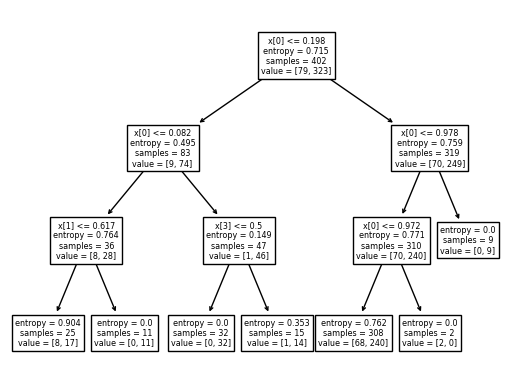

In [29]:
# plot the decision treee
tree.plot_tree(model)

In [30]:
df_norm.columns

Index(['Under_grad', 'city_pop', 'work_exp', 'Urban',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'tax_income_Good'],
      dtype='object')

[Text(0.5769230769230769, 0.875, 'Under_grad <= 0.198\nentropy = 0.715\nsamples = 402\nvalue = [79, 323]\nclass = 0'),
 Text(0.3076923076923077, 0.625, 'Under_grad <= 0.082\nentropy = 0.495\nsamples = 83\nvalue = [9, 74]\nclass = 0'),
 Text(0.15384615384615385, 0.375, 'city_pop <= 0.617\nentropy = 0.764\nsamples = 36\nvalue = [8, 28]\nclass = 0'),
 Text(0.07692307692307693, 0.125, 'entropy = 0.904\nsamples = 25\nvalue = [8, 17]\nclass = 0'),
 Text(0.23076923076923078, 0.125, 'entropy = 0.0\nsamples = 11\nvalue = [0, 11]\nclass = 0'),
 Text(0.46153846153846156, 0.375, 'Urban <= 0.5\nentropy = 0.149\nsamples = 47\nvalue = [1, 46]\nclass = 0'),
 Text(0.38461538461538464, 0.125, 'entropy = 0.0\nsamples = 32\nvalue = [0, 32]\nclass = 0'),
 Text(0.5384615384615384, 0.125, 'entropy = 0.353\nsamples = 15\nvalue = [1, 14]\nclass = 0'),
 Text(0.8461538461538461, 0.625, 'Under_grad <= 0.978\nentropy = 0.759\nsamples = 319\nvalue = [70, 249]\nclass = 0'),
 Text(0.7692307692307693, 0.375, 'Under_gr

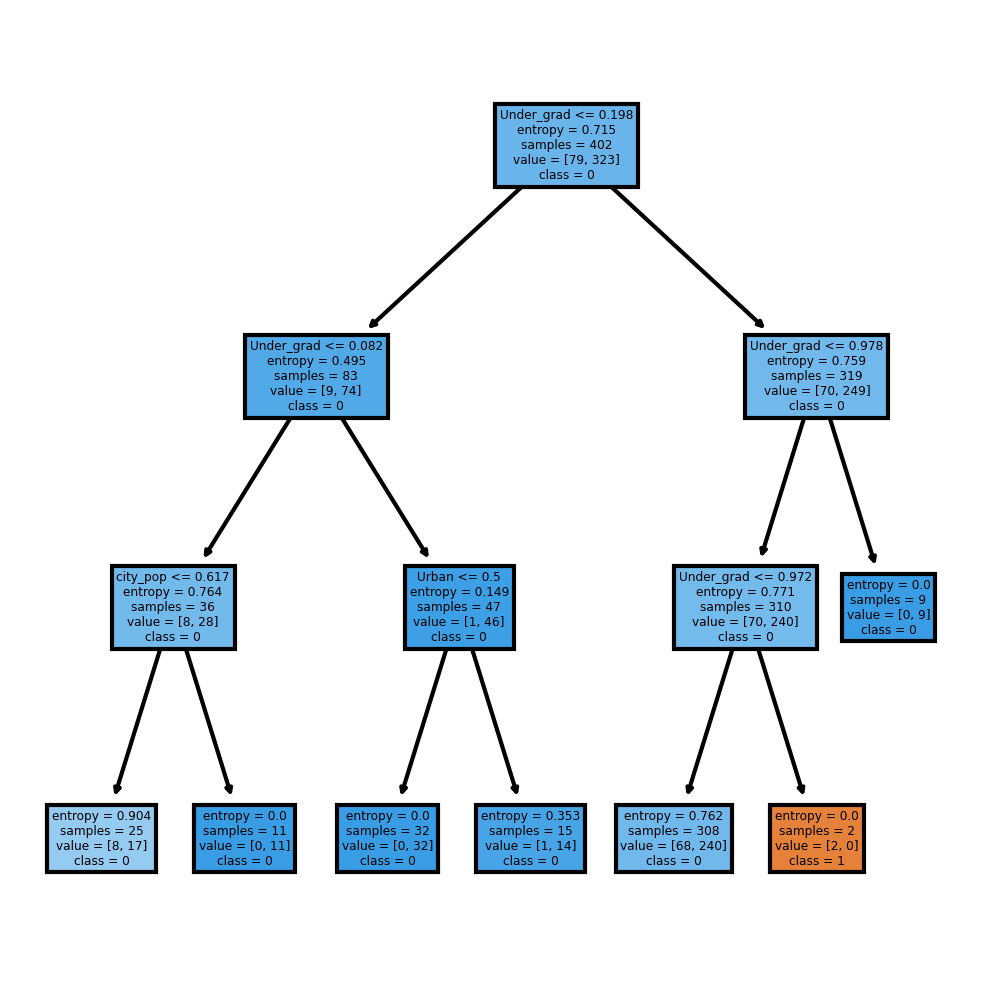

In [31]:
fn = ['Under_grad','city_pop', 'work_exp', 'Urban','Marital_Status_Divorced', 'Marital_Status_Married','Marital_Status_Single']
cn =  ["1","0"]
fig,axes = plt.subplots(nrows=1,ncols= 1,figsize=(4,4),dpi = 300)
tree.plot_tree(model,feature_names =fn,class_names = cn,filled = True)

In [32]:
# prediction on test data
                            # entropy  = 0 ----pure region

preds = model.predict(x_test)

pd.Series(preds).value_counts()  # getting count of each category

1.0    197
0.0      1
dtype: int64

In [33]:
pd.crosstab(y_test,preds)  # table for correct and wrong prediction

col_0,0.0,1.0
tax_income_Good,,
0.0,0,45
1.0,1,152


In [34]:
# accuracy
np.mean(preds == y_test)


0.7676767676767676

# building decision tree classifier (CART ) using Gini Criteria

In [35]:
from sklearn.tree import DecisionTreeClassifier
model_gini= DecisionTreeClassifier(criterion = "gini",max_depth =2)

In [36]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [37]:
# prediction ans computing accuracy

pred = model.predict(x_test)
np.mean(preds == y_test)

0.7676767676767676

# decision tree regression example

In [38]:
#decision tree regression


from sklearn.tree import DecisionTreeRegressor

In [39]:
x = df_norm.drop(columns = "tax_income_Good").iloc[:,1:]
y = df_norm["tax_income_Good"]

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=1)

In [41]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [42]:
# finding the accuracy
model.score(x_test,y_test)

-0.7544303797468361

In [43]:
metrics.accuracy_score(y_test,preds)

0.7929292929292929